This kernel is about some data exploration with plots on the Dataset 911 Emergency Calls. I  am using it to practice some Python visualization skills learned from Jose Portilla's Python course, as well as a show window for newbies on Python. Let's start!

In [7]:
import numpy as np #for numerical operations
import pandas as pd #for working with dataframes
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization
%matplotlib inline
#to be able to show plots in this jupyter notebook

In [9]:
df = pd.read_csv("../input/911.csv") #import dataframe to this kernel

Check the basic information:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205580 entries, 0 to 205579
Data columns (total 9 columns):
lat          205580 non-null float64
lng          205580 non-null float64
desc         205580 non-null object
zip          180597 non-null float64
title        205580 non-null object
timeStamp    205580 non-null object
twp          205506 non-null object
addr         205580 non-null object
e            205580 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 14.1+ MB


In [12]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Basic Exploration:


 1. Top zipcodes for 911 calls?
2. Top 5 townships for 911 calls?
3. how many unique title codes are?

In [14]:
df["zip"].value_counts().head(5)

19401.0    14234
19464.0    13859
19403.0    10372
19446.0     9910
19406.0     6777
Name: zip, dtype: int64

In [19]:
df["twp"].value_counts().head(5)

LOWER MERION    17646
ABINGTON        12570
NORRISTOWN      11892
UPPER MERION    10699
CHELTENHAM       9461
Name: twp, dtype: int64

In [21]:
df["title"].nunique()

125

##Creating new features
In the title feature we have the reason/department , the values are as example similar to ``EMS: DIABETIC EMERGENCY``
I will create a new column splitting the value Reason `EMS`


In [27]:
df["Reason"] = df["title"].apply(lambda title: title.split(":")[0])

In [64]:
df["Reason"].head(10)

0        EMS
1        EMS
2       Fire
3        EMS
4        EMS
5        EMS
6        EMS
7        EMS
8        EMS
9    Traffic
Name: Reason, dtype: object

What is the most common reason for calling 911?

In [30]:
df["Reason"].value_counts()

EMS        102623
Traffic     72404
Fire        30553
Name: Reason, dtype: int64

plotting

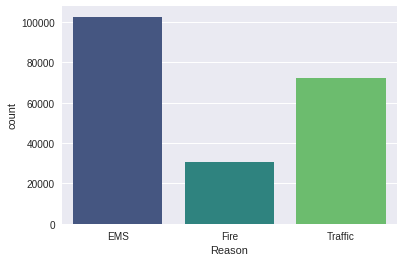

In [31]:
sns.countplot( x= "Reason", data = df, palette = "viridis")

No doubt biggest numbers are for calls `EMS` (Emergency Medical Service), followed by `traffic` and more far away for Fire reasons`

In [34]:
type(df["timeStamp"].iloc[0])

str

In [38]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
df["timeStamp"].iloc[0]

Timestamp('2015-12-10 17:10:52')

Create new columns for slicing the time attribute.

In [44]:
df["Hour"] = df["timeStamp"].apply(lambda time: time.hour)
df["Month"] = df["timeStamp"].apply(lambda time: time.month)
df["Day of the Week"] = df["timeStamp"].apply(lambda time: time.dayofweek)

In [46]:
df["Day of the Week"].head(10)

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: Day of the Week, dtype: int64

I will assign this integer numbers for day of the week to the corresponding names of the weekdays

In [48]:
dmap = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"} #create the map dictionary
df["Day of the Week"] = df["Day of the Week"].map(dmap)

Now I will plot a countplot of the new column, Day of the Week, with hue based off the Reason Column

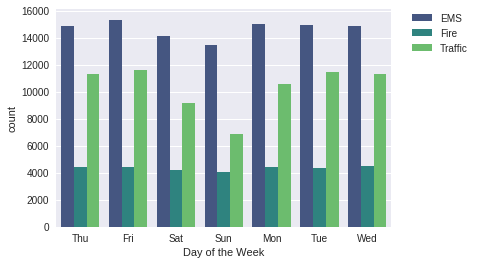

In [59]:
sns.countplot(x = "Day of the Week", data = df, hue = "Reason", palette = "viridis")
#I need to relocate the legend that by default is drawn in the midlle of the graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2,  borderaxespad = 0.)

We do have much more stability on count numbers if we look within the week days. A bit difference is seen in `Traffic`calls value. Not surprisingly saturday and sundays there is a valley on the number of calls. Is it because weekends people is much more relaxed and have better driving? is it because there are fewer cars on the street?

now, the same for month

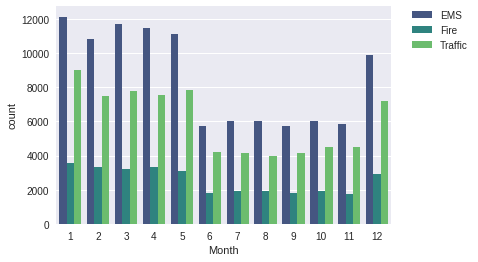

In [60]:
sns.countplot(x = "Month", data = df, hue = "Reason", palette = "viridis")
#I need to relocate the legend that by default is drawn in the midlle of the graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2,  borderaxespad = 0.)

It seems that colder months are more sensible in `EMS` ocurrences as well as the other reasons.

Create a new column `Date` that contains the date from the `timeStamp` column

In [63]:
df["Date"] = df["timeStamp"].apply(lambda t: t.date())
df["Date"].head(5)

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

now, I will group from this Date columns

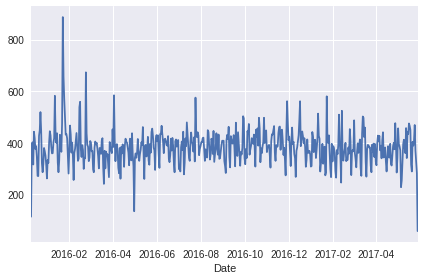

In [65]:
df.groupby("Date").count()["twp"].plot()
plt.tight_layout()

the same, but now separating each reason:

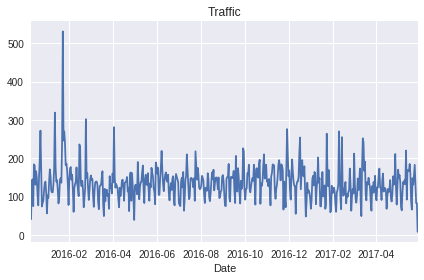

In [67]:
df[df["Reason"]== "Traffic"].groupby("Date").count()["twp"].plot()
plt.title("Traffic")
plt.tight_layout()

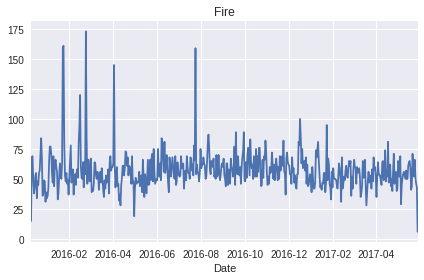

In [69]:
df[df["Reason"]== "Fire"].groupby("Date").count()["twp"].plot()
plt.title("Fire")
plt.tight_layout()

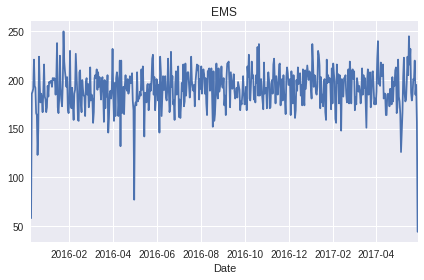

In [70]:
df[df["Reason"]== "EMS"].groupby("Date").count()["twp"].plot()
plt.title("EMS")
plt.tight_layout()

##Heatmaps Time!!!!!

I love Heatmaps for analysing values along time series. At the end our brain is used to wath time events in the form of a calendar week, month or year. Once the data is correctly displayed for us to interpret we can easily find unsual or explainable patterns.
For heatmaps we need to reshape a bit the dataframe. I need the columns to be hours and the Index to become the Day of the Week.

In [72]:
dayHour = df.groupby(by = ["Day of the Week", "Hour"]).count()["Reason"].unstack()
dayHour.head(7)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of the Week,,,,,,,,,,,,,,,,,,,,,
Fri,554,493,448,414,379,466,859,1350,1572,1610,...,1889,2070,2142,2146,1647,1544,1364,1184,1105,875
Mon,561,442,429,379,433,541,858,1385,1777,1747,...,1763,1956,1983,2015,1735,1421,1207,950,838,641
Sat,743,622,534,509,490,482,581,778,1018,1344,...,1656,1632,1634,1585,1547,1484,1234,1135,1027,968
Sun,745,660,640,534,458,468,562,738,928,1223,...,1452,1395,1371,1481,1421,1302,1091,979,766,685
Thu,564,413,466,365,357,512,893,1451,1682,1757,...,1838,1998,1959,2162,1741,1438,1277,1122,887,705
Tue,555,461,417,373,398,495,866,1421,1787,1786,...,1879,1946,2157,2072,1824,1437,1265,1062,828,617
Wed,524,461,391,421,337,508,898,1479,1694,1717,...,1858,1940,2089,2093,1780,1433,1324,1104,883,670


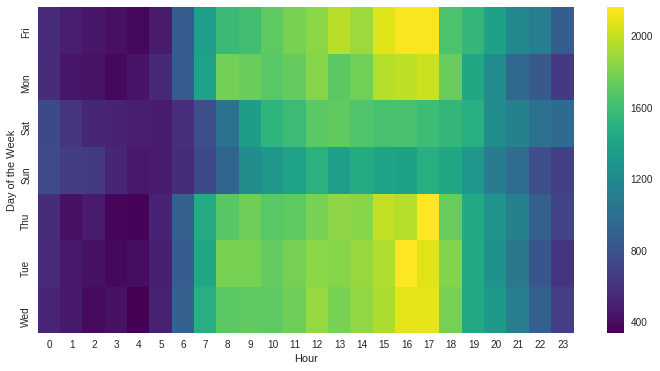

In [73]:
plt.figure(figsize = (12,6)) #canvas size
sns.heatmap(dayHour, cmap = "viridis")

As we can observe daylight hours are more usual to have 911 calls than night time. Quite an intuitive answer, as at those hours  much more people is awake, therefore there is much more chance to some event ocurrence than other hours with most people is resting at home.

Now I will create a clustermap using this DataFrame.

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


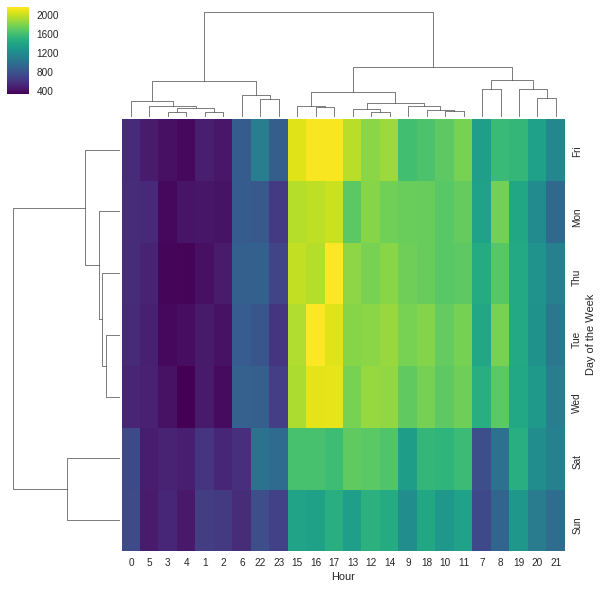

In [74]:
sns.clustermap(dayHour, cmap = "viridis")

now, I will repeat but using the Month as the column

In [77]:
dayMonth = df.groupby(by = ["Day of the Week", "Month"]).count()["Reason"].unstack()
dayMonth.head(7)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of the Week,,,,,,,,,,,,
Fri,3527,3171,3532,3574,3278,1647,2042,1740,2195,1901,1699,3116
Mon,3706,3552,3103,3088,3351,1609,1685,1865,1552,2042,1682,2777
Sat,3527,2871,2539,3490,2764,1376,1691,1423,1406,1935,1516,2975
Sun,3470,2339,2229,3026,2580,1329,1667,1360,1235,1757,1281,2177
Thu,3182,3189,3909,3097,3289,2055,1642,1579,2165,1625,1630,3264
Tue,3953,3160,3529,3065,3579,1671,1650,1993,1559,1542,2193,2933
Wed,3336,3381,3902,3003,3225,2045,1711,1944,1557,1700,2090,2836


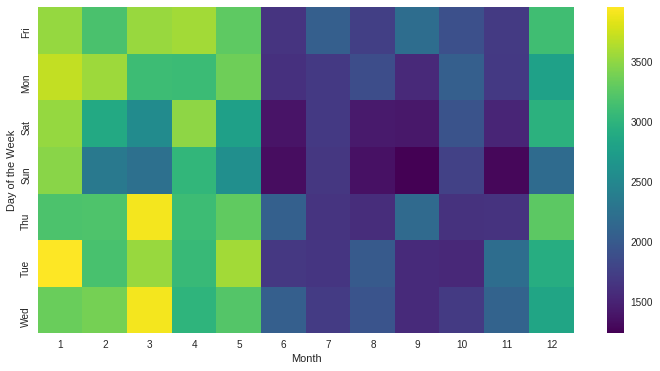

In [78]:
plt.figure(figsize = (12,6)) #canvas size
sns.heatmap(dayMonth, cmap = "viridis")

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


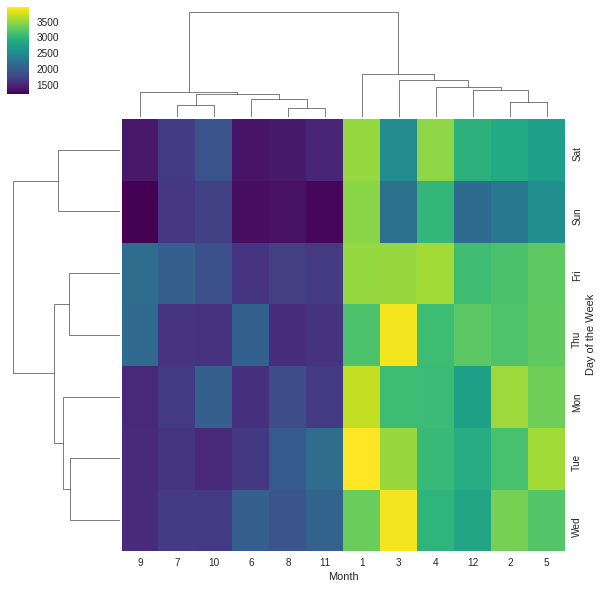

In [79]:
sns.clustermap(dayMonth, cmap = "viridis")